# CeCoIn5, B = 0T, Dispersion Fitting #


In [1]:
#Basic setup of Jupyter notebook.
#Use active matplotlib notebook, and another option is %matplotlib inline
%matplotlib notebook 
#matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Directory Setup and Data load ###

In [4]:
import sys, os
directory = "E:\Dropbox\Research\experiment data\CeCoIn5_MACS_20180125\macsanalysis"
datadir = "E:\Dropbox\Research\experiment data\CeCoIn5_MACS_20170630\rawData"
os.chdir(directory)
sys.path.append(directory)
sys.path.append(datadir)

from DataClass import *
from FitClass import *
ltFilename = "CeCoIn5_0p1K_0T.txt"
ltData = MACSData(ltFilename) # low temperature data.
htFilename = "CeCoIn5_2p5K_10T.txt"
htData = MACSData(htFilename) # high temperature data.


Datafile CeCoIn5_0p1K_0T.txt has been successfully imported. Data dimensions: (147620, 5)
Datafile CeCoIn5_2p5K_10T.txt has been successfully imported. Data dimensions: (147620, 5)


### 2D View ###

<IPython.core.display.Javascript object>


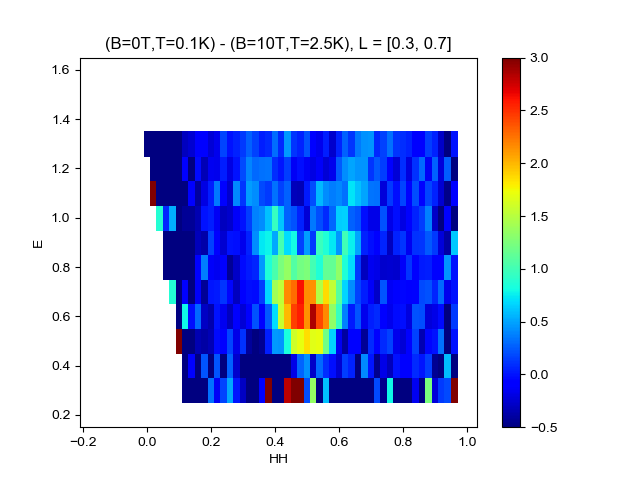

(<matplotlib.figure.Figure at 0xae17ba8>,
 <matplotlib.axes._subplots.AxesSubplot at 0xe909e80>)

In [12]:
# -------HE plane, folded data--------
bin_ax1 = [-0.2, 0.02, 1]
bin_ax2 = [0.3, 0.7]
bin_ax3 = [0.2, 0.1, 1.5]

ltfigure = ltData.plot(view_ax=13, bin_ax1=bin_ax1, bin_ax2=bin_ax2, bin_ax3=bin_ax3, foldmode=12, plotflag=False, 
                       title='B = 0T, T = 0.1K, L = '+str(bin_ax2), clim=(0,2), xlabel='HH', ylabel='E')
htfigure = htData.plot(view_ax=13, bin_ax1=bin_ax1, bin_ax2=bin_ax2, bin_ax3=bin_ax3, foldmode=12, plotflag=False, 
                       title='B = 10T, T = 2.5K, L = '+str(bin_ax2), clim=(0,2), xlabel='HH', ylabel='E')
subfigure = subtraction(ltfigure, htfigure)
subfigure.plot(title='(B=0T,T=0.1K) - (B=10T,T=2.5K), L = '+str(bin_ax2),clim=(-0.5,3), xlabel='HH', ylabel='E')

### Energy Scan ###

<IPython.core.display.Javascript object>


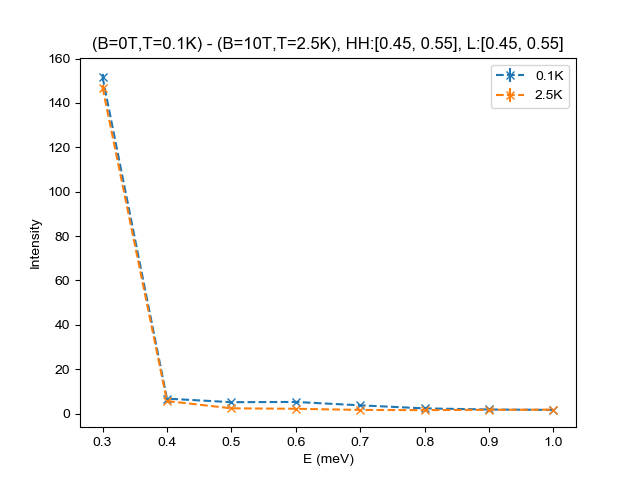

<IPython.core.display.Javascript object>


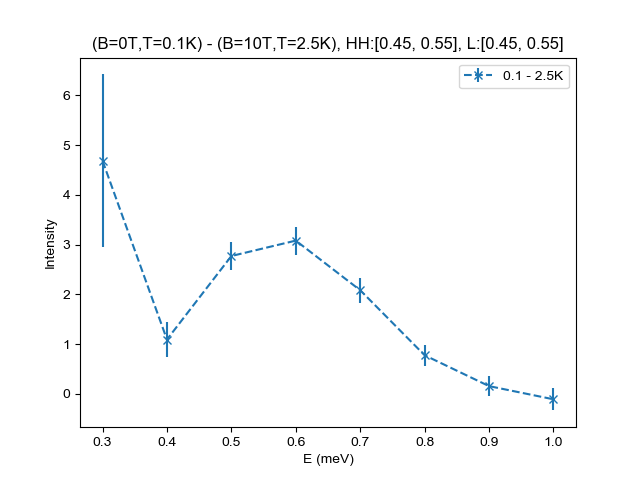

(<matplotlib.figure.Figure at 0xefcf358>,
 <matplotlib.axes._subplots.AxesSubplot at 0xf56c828>)

In [28]:
bin_ax1 = [0.45, 0.55]
bin_ax2 = [0.45, 0.55]

ltEScan = ltData.plot(view_ax=3,bin_ax1=bin_ax1,bin_ax2=bin_ax2,bin_ax3=[0.2,0.1,1],foldmode=12,plotflag=False)
htEScan = htData.plot(view_ax=3,bin_ax1=bin_ax1,bin_ax2=bin_ax2,bin_ax3=[0.2,0.1,1],foldmode=12,plotflag=False)
subEScan = subtraction(ltEScan, htEScan, plotmode=1, marker='x',linestyle='--',legend=['0.1K','2.5K'],
                       title='(B=0T,T=0.1K) - (B=10T,T=2.5K), HH:'+str(bin_ax1)+", L:"+str(bin_ax2),
                       xlabel='E (meV)',ylabel='Intensity')
subEScan.plot(marker='x',linestyle='--',title='(B=0T,T=0.1K) - (B=10T,T=2.5K), HH:'+str(bin_ax1)+", L:"+str(bin_ax2),
              legend=['0.1 - 2.5K'],
              xlabel='E (meV)',ylabel='Intensity')

### One Gaussian Fit ###

In [33]:
# Model Input
oneGaussianModel = ufit.Background(bkgd=0) + ufit.Gauss('Peak', pos=0.5, ampl=0.38, fwhm=0.2)

Fit results for One Gaussian, 0.5 meV
> The relative error between two consecutive iterates is at most 0.000000
--------------------------------------------------------------------------------
bkgd            = 7.8144e-09 +/-   0.058469
Peak_pos        =    0.50312 +/-  0.0054495
Peak_ampl       =     1.7011 +/-    0.20333
Peak_fwhm       =    0.11114 +/-   0.013049
chi^2/NDF       =      1.382


<IPython.core.display.Javascript object>


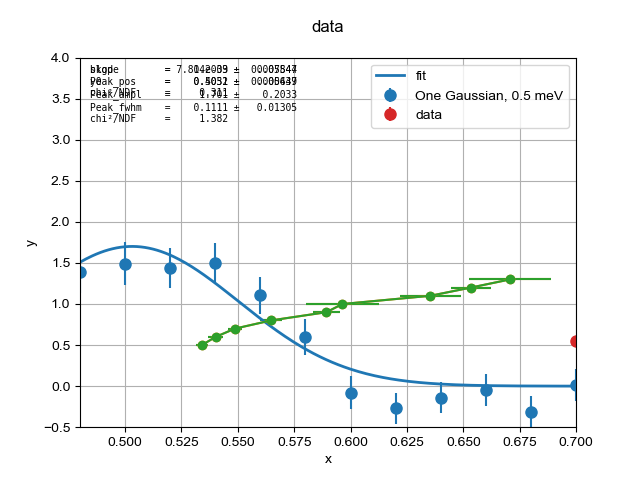

(0, 1)

(-0.5, 4)

In [37]:
bin_ax1 = [0, 0.02, 1]
bin_ax2 = [0.25,0.75]
E = 0.5

bin_ax3 = [E - 0.01, E + 0.01]
ltHHScan = ltData.plot(view_ax=1,bin_ax1=bin_ax1,bin_ax2=bin_ax2,bin_ax3=bin_ax3,foldmode=12,plotflag=False)
htHHScan = htData.plot(view_ax=1,bin_ax1=bin_ax1,bin_ax2=bin_ax2,bin_ax3=bin_ax3,foldmode=12,plotflag=False)
subHHScan = subtraction(ltHHScan, htHHScan, plotmode=0)
    
fit1D = Fit1D(subHHScan, model = oneGaussianModel, name="One Gaussian, " + str(E) + " meV")
fit1D.fit()
plt.xlim((0,1))
plt.ylim((-0.5,4))

### Two Gaussian Fit ###

In [38]:
# model Input
twoGaussianModel = ufit.Background(bkgd=0) \
                    + ufit.Gauss('Peak1', pos='0.5+delta', ampl=0.3, fwhm='fwhm') \
                    + ufit.Gauss('Peak2', pos='0.5-delta', ampl=0.3, fwhm='fwhm')
twoGaussianModel.add_params(delta=0.05)
twoGaussianModel.add_params(fwhm=0.087)

Fit results for Two Gaussians, 1.3 meV
> Both actual and predicted relative reductions in the sum of squares
  are at most 0.000000
--------------------------------------------------------------------------------
bkgd            = 4.3003e-09 +/-   0.056751
Peak1_pos       =     0.6709 +/-          0 (fixed: 0.5+delta)
Peak1_ampl      =    0.32596 +/-    0.11496
Peak1_fwhm      =    0.12334 +/-          0 (fixed: fwhm)
Peak2_pos       =     0.3291 +/-          0 (fixed: 0.5-delta)
Peak2_ampl      =    0.18302 +/-   0.098639
Peak2_fwhm      =    0.12334 +/-          0 (fixed: fwhm)
delta           =     0.1709 +/-   0.018218
fwhm            =    0.12334 +/-   0.058401
chi^2/NDF       =     0.8701


<IPython.core.display.Javascript object>


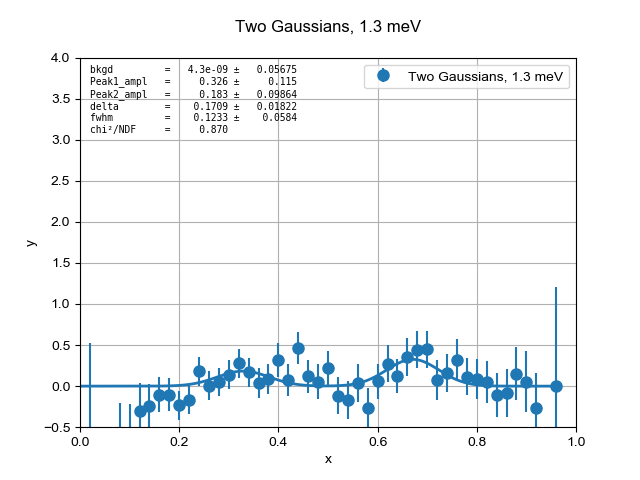

(0, 1)

(-0.5, 4)

In [46]:
bin_ax1 = [0, 0.02, 1]
bin_ax2 = [0.3,0.7]

E = 1.3
bin_ax3 = [E - 0.01, E + 0.01]
ltHHScan = ltData.plot(view_ax=1,bin_ax1=bin_ax1,bin_ax2=bin_ax2,bin_ax3=bin_ax3,foldmode=12,plotflag=False)
htHHScan = htData.plot(view_ax=1,bin_ax1=bin_ax1,bin_ax2=bin_ax2,bin_ax3=bin_ax3,foldmode=12,plotflag=False)
subHHScan = subtraction(ltHHScan, htHHScan, plotmode=0)

fit1D = Fit1D(subHHScan, model = twoGaussianModel, name="Two Gaussians, " + str(E) + " meV")
fit1D.fit()
plt.xlim((0,1))
plt.ylim((-0.5,4))
plt.show()


## Summary ##

### Dispersion ###

<IPython.core.display.Javascript object>


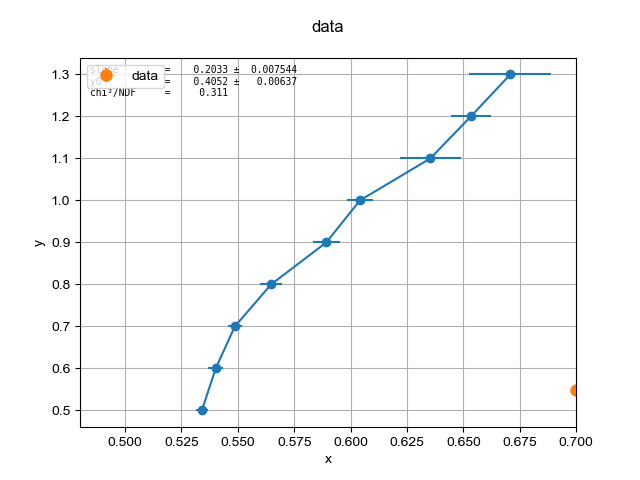

<IPython.core.display.Javascript object>


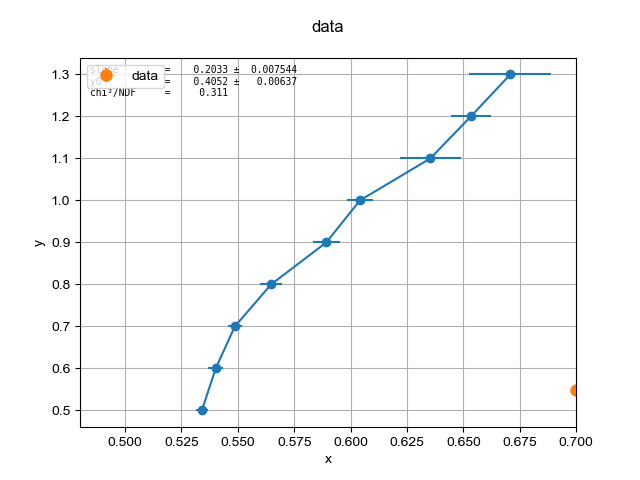

<Container object of 3 artists>

Text(0.5,0,'HH')

Text(0,0.5,'Energy (meV)')

(0.48, 0.7)

Text(0.5,1,'Two Gaussian Fitting Results, (B=0T,T=0.1K) - (B=10T,T=2.5K), width not fixed')

In [67]:
delta = np.array([[0.5, 0.03406, 0.0027355], 
                  [0.6, 0.0402, 0.003444], 
                  [0.7, 0.048688, 0.003142], 
                  [0.8, 0.06477, 0.00497], 
                  [0.9, 0.089263, 0.00613], 
                  [1, 0.10417, 0.0058775], 
                  [1.1, 0.1354, 0.013554], 
                  [1.2, 0.15337, 0.009], 
                  [1.3, 0.1709, 0.018218]])
dispersion = delta
dispersion[:,1] += 0.5
plt.figure()
plt.errorbar(y=dispersion[:,0], x=dispersion[:,1], xerr=dispersion[:,2], fmt='o-',capthick=2)
plt.xlabel('HH')
plt.ylabel('Energy (meV)')
plt.xlim((0.48, 0.7))
plt.title('Two Gaussian Fitting Results, (B=0T,T=0.1K) - (B=10T,T=2.5K), width not fixed')

### More analysis on dispersion ###
Try to fit the upper part [0.7, 1.3] meV spin velocity and lower part [0.5, 0.7] meV seperately.

In [54]:
delta = np.array([[0.5, 0.03406, 0.0027355], 
                  [0.6, 0.0402, 0.003444], 
                  [0.7, 0.048688, 0.003142], 
                  [0.8, 0.06477, 0.00497], 
                  [0.9, 0.089263, 0.00613], 
                  [1, 0.10417, 0.0058775], 
                  [1.1, 0.1354, 0.013554], 
                  [1.2, 0.15337, 0.009], 
                  [1.3, 0.1709, 0.018218]])
dispersion = delta
dispersion[:,1] += 0.5

<IPython.core.display.Javascript object>


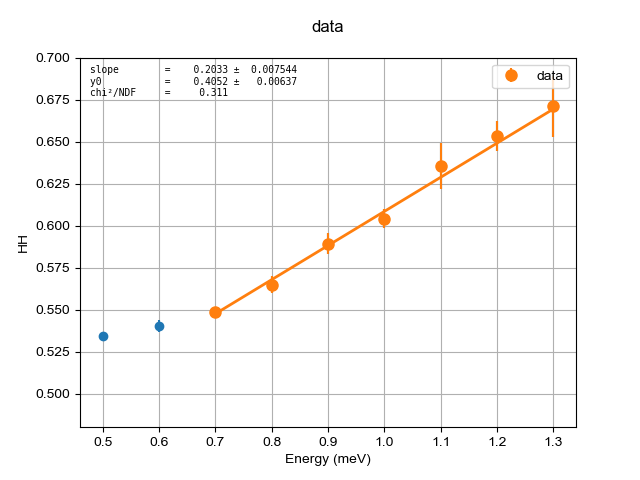

<IPython.core.display.Javascript object>


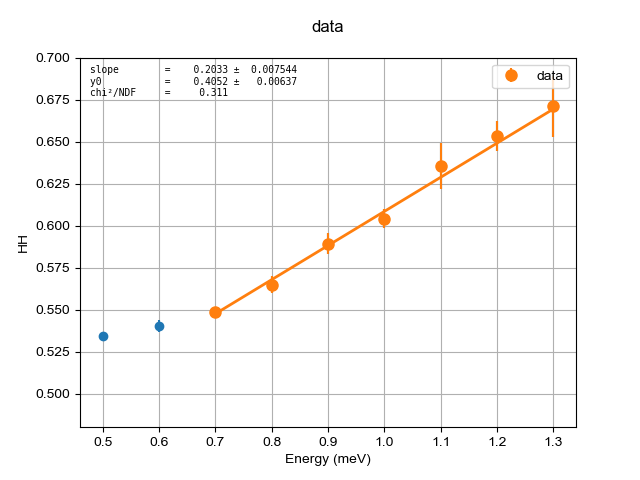

<Container object of 3 artists>

(0.48, 0.7)

Text(0.5,0,'Energy (meV)')

Text(0,0.5,'HH')

In [79]:
import ufit
linearModel = ufit.StraightLine(slope=1, y0=0)

# dispersion upper part [0.7, 1.3]meV
dispersionUpper = dispersion[2:,:]
dispersionUpper = ufit.as_data(x=dispersionUpper[:,0],y=dispersionUpper[:,1],dy=dispersionUpper[:,2])
fitresult_dispersionUpper = linearModel.fit(dispersionUpper)

plt.figure()
plt.errorbar(x=dispersion[:,0],y=dispersion[:,1], yerr=dispersion[:,2], fmt='o',capthick=2)
fitresult_dispersionUpper.plot()

plt.ylim((0.48, 0.7))
plt.xlabel('Energy (meV)')
plt.ylabel('HH')

In [ ]:
dispersionUpper
